In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#Reading in .csv file
df = pd.read_csv('Baldrick.csv')
#If the above read in doesn't work, try using the one below with the full path
# df = pd.read_csv('/tornado/home1/class/fall22/ajtomanek/573_final_project/Baldrick/Baldrick.csv')
df.head()

Unnamed: 0  Mean  % of Unnamed: 3 Unnamed: 4 Mean.1 % of.1 Unnamed: 7  \
0              NaN   Air   Mon    Max Air    Min Air   Wind    Mon     Result   
1              NaN  Temp  Data       Temp       Temp  Speed   Data       Wind   
2              Mon   (C)   Abs        (C)        (C)  (m/s)    Abs       (dir   
3              NaN   NaN   NaN        NaN        NaN    NaN    NaN        NaN   
4  Baldrick (9116)   NaN   NaN        NaN    82.774S    NaN    NaN    13.054W   

  Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Mean.2 % of.2 Unnamed: 14  \
0        NaN        NaN         Max         NaN    Air    Mon     Max Air   
1        NaN        NaN        Wind         NaN  Press   Data       Press   
2        vv)        Con        (dir         vv)   (mb)    Abs        (mb)   
3        NaN        NaN         NaN         NaN    NaN    NaN         NaN   
4        NaN        NaN         NaN       1968M    NaN   2009         NaN   

  Unnamed: 15 Unnamed: 16  
0     Min Air   Potential  
1       Press        Temp  
2        (mb)         (K)  
3         NaN         NaN  
4         NaN         NaN

In [3]:
station_name = 'Baldrick (9116)'
save_path = '/tornado/home1/class/fall22/ajtomanek/573_tomanek_final/Baldrick'

In [4]:
#Rename columns to associate with data type 
df = df.rename(columns={'Unnamed: 0':'month','Mean':'mean temp', '% of': '% temp missing', 'Unnamed: 3': 'max air temp', 
                             'Unnamed: 4': 'min air temp', 'Mean.1': 'mean wind speed (m/s)', '% of.1': '% wind missing', 'Unnamed: 7': 
                             'result wind direction', 'Unnamed: 8': 'result wind vv', 'Unnamed: 9': 'Con', 'Unnamed: 10': 'max wind direction',
                            'Unnamed: 11': 'max wind vv', 'Mean.2': 'mean air pressure (mb)', '% of.2': '% pressure missing', 'Unnamed: 14':
                            'max air pressure', 'Unnamed: 15': 'min air pressure', 'Unnamed: 16': 'theta (K)'})
# #Drop unnamed columns at the end with no data
# df = df.drop(columns = {'Unnamed: 17', 'Unnamed: 18'})
df

month mean temp % temp missing max air temp min air temp  \
0                NaN       Air            Mon      Max Air      Min Air   
1                NaN      Temp           Data         Temp         Temp   
2                Mon       (C)            Abs          (C)          (C)   
3                NaN       NaN            NaN          NaN          NaN   
4    Baldrick (9116)       NaN            NaN          NaN      82.774S   
..               ...       ...            ...          ...          ...   
245              Sep       NaN            NaN          NaN          NaN   
246              Oct       NaN            NaN          NaN          NaN   
247              Nov       NaN            NaN          NaN          NaN   
248              Dec       NaN            NaN          NaN          NaN   
249             MEAN     -40.9            NaN          NaN          NaN   

    mean wind speed (m/s) % wind missing result wind direction result wind vv  \
0                    Wind            Mon                Result            NaN   
1                   Speed           Data                  Wind            NaN   
2                   (m/s)            Abs                  (dir            vv)   
3                     NaN            NaN                   NaN            NaN   
4                     NaN            NaN               13.054W            NaN   
..                    ...            ...                   ...            ...   
245                   NaN            NaN                   NaN            NaN   
246                   NaN            NaN                   NaN            NaN   
247                   NaN            NaN                   NaN            NaN   
248                   NaN            NaN                   NaN            NaN   
249                   8.4            NaN                   NaN            8.2   

      Con max wind direction max wind vv mean air pressure (mb)  \
0     NaN                Max         NaN                    Air   
1     NaN               Wind         NaN                  Press   
2     Con               (dir         vv)                   (mb)   
3     NaN                NaN         NaN                    NaN   
4     NaN                NaN       1968M                    NaN   
..    ...                ...         ...                    ...   
245   NaN                NaN         NaN                    NaN   
246   NaN                NaN         NaN                    NaN   
247   NaN                NaN         NaN                    NaN   
248   NaN                NaN         NaN                    NaN   
249  0.96                NaN         NaN                  761.5   

    % pressure missing max air pressure min air pressure  theta (K)  
0                  Mon          Max Air          Min Air  Potential  
1                 Data            Press            Press       Temp  
2                  Abs             (mb)             (mb)        (K)  
3                  NaN              NaN              NaN        NaN  
4                 2009              NaN              NaN        NaN  
..                 ...              ...              ...        ...  
245                NaN              NaN              NaN        NaN  
246                NaN              NaN              NaN        NaN  
247                NaN              NaN              NaN        NaN  
248                NaN              NaN              NaN        NaN  
249                NaN              NaN              NaN        NaN  

[250 rows x 17 columns]

In [5]:
#Drop the top four indecies now that everything is named
df = df.drop(index = [0, 1, 2, 3])

In [6]:
#Set the datatype as a string for the month column as it is in string format
df['month'] = df['month'].astype('string')

In [7]:
#Drop the rows in the column month that start with the following:
df = df.loc[(df['month'] != 'MEAN') & (df['month'] != 'NaN') & (df['month'] != 'Month')]

In [8]:
#Reset the indecies
df.reset_index(inplace=True, drop=True)
df

month mean temp % temp missing max air temp min air temp  \
0    Baldrick (9116)       NaN            NaN          NaN      82.774S   
1                Jan     -19.5             00        -10.6        -28.0   
2                Feb     -31.4             00        -19.3        -43.7   
3                Mar     -39.5             00        -22.8        -54.4   
4                Apr     -43.9             00        -16.8        -55.5   
..               ...       ...            ...          ...          ...   
181              Aug     -50.4             00        -30.4        -57.9   
182              Sep       NaN            NaN          NaN          NaN   
183              Oct       NaN            NaN          NaN          NaN   
184              Nov       NaN            NaN          NaN          NaN   
185              Dec       NaN            NaN          NaN          NaN   

    mean wind speed (m/s) % wind missing result wind direction result wind vv  \
0                     NaN            NaN               13.054W            NaN   
1                     5.6             00                   058            5.1   
2                     6.4             00                   067            5.9   
3                     8.4             00                   075            7.9   
4                     9.6             00                   073            9.4   
..                    ...            ...                   ...            ...   
181                  10.1            6.5                    89           10.0   
182                   NaN            NaN                   NaN            NaN   
183                   NaN            NaN                   NaN            NaN   
184                   NaN            NaN                   NaN            NaN   
185                   NaN            NaN                   NaN            NaN   

      Con max wind direction max wind vv mean air pressure (mb)  \
0     NaN                NaN       1968M                    NaN   
1    0.92                070          10                  763.8   
2    0.93                080          12                  762.5   
3    0.94                064          16                  758.9   
4    0.98                093          16                  760.7   
..    ...                ...         ...                    ...   
181  0.99                108          18                  758.8   
182   NaN                NaN         NaN                    NaN   
183   NaN                NaN         NaN                    NaN   
184   NaN                NaN         NaN                    NaN   
185   NaN                NaN         NaN                    NaN   

    % pressure missing max air pressure min air pressure theta (K)  
0                 2009              NaN              NaN       NaN  
1                   13            771.7            755.9     274.4  
2                   00            777.3            744.5     261.2  
3                   00            775.7            737.9     252.9  
4                   00            782.4            748.6     247.9  
..                 ...              ...              ...       ...  
181                 00            780.1            741.9     241.0  
182                NaN              NaN              NaN       NaN  
183                NaN              NaN              NaN       NaN  
184                NaN              NaN              NaN       NaN  
185                NaN              NaN              NaN       NaN  

[186 rows x 17 columns]

In [9]:
#Change the type of the column to numerics
df['% pressure missing'] = pd.to_numeric(df['% pressure missing'], errors = 'coerce')

In [10]:
#Create a new column in our dataframe for the year values
df['year'] = ''

In [11]:
#Create starting point for the years we are searching for
start = df['% pressure missing'].loc[df['% pressure missing'] >= 1000]

first_year = start[0]
current_year = first_year

start_index = df['% pressure missing'].loc[df['% pressure missing'] == first_year].index[0]
end_index = 99999

#Create for loop which will look for the years within the dataset column and assign values to the year column in the appropraite indecies 
for val in (df['% pressure missing']): 

    if ((val == current_year) | (val < 1000) | (str(val) == 'nan')):
        continue
    else:
        end_index = df['% pressure missing'].loc[df['% pressure missing'] == val].index[0]-1
        df.loc[start_index : end_index, 'year'] = current_year
        start_index = end_index+1
        current_year = val
        if (val == 2022): 
            df.loc[end_index+2:, 'year'] = current_year

#Change the data in the years column to numerics 
df['year'] = pd.to_numeric(df['year'], errors = 'coerce')

In [12]:
df = df.loc[df['month'] != station_name]
df = df.loc[df['month'] != 'Mean']
df = df.loc[df['month'] != 'Mon']
df

month mean temp % temp missing max air temp min air temp  \
1     Jan     -19.5             00        -10.6        -28.0   
2     Feb     -31.4             00        -19.3        -43.7   
3     Mar     -39.5             00        -22.8        -54.4   
4     Apr     -43.9             00        -16.8        -55.5   
5     May     -40.3             00        -19.5        -54.0   
..    ...       ...            ...          ...          ...   
181   Aug     -50.4             00        -30.4        -57.9   
182   Sep       NaN            NaN          NaN          NaN   
183   Oct       NaN            NaN          NaN          NaN   
184   Nov       NaN            NaN          NaN          NaN   
185   Dec       NaN            NaN          NaN          NaN   

    mean wind speed (m/s) % wind missing result wind direction result wind vv  \
1                     5.6             00                   058            5.1   
2                     6.4             00                   067            5.9   
3                     8.4             00                   075            7.9   
4                     9.6             00                   073            9.4   
5                     9.1             02                   073            8.8   
..                    ...            ...                   ...            ...   
181                  10.1            6.5                    89           10.0   
182                   NaN            NaN                   NaN            NaN   
183                   NaN            NaN                   NaN            NaN   
184                   NaN            NaN                   NaN            NaN   
185                   NaN            NaN                   NaN            NaN   

      Con max wind direction max wind vv mean air pressure (mb)  \
1    0.92                070          10                  763.8   
2    0.93                080          12                  762.5   
3    0.94                064          16                  758.9   
4    0.98                093          16                  760.7   
5    0.97                086          16                  766.2   
..    ...                ...         ...                    ...   
181  0.99                108          18                  758.8   
182   NaN                NaN         NaN                    NaN   
183   NaN                NaN         NaN                    NaN   
184   NaN                NaN         NaN                    NaN   
185   NaN                NaN         NaN                    NaN   

     % pressure missing max air pressure min air pressure theta (K)    year  
1                  13.0            771.7            755.9     274.4  2009.0  
2                   0.0            777.3            744.5     261.2  2009.0  
3                   0.0            775.7            737.9     252.9  2009.0  
4                   0.0            782.4            748.6     247.9  2009.0  
5                   0.0            784.0            743.2     251.3  2009.0  
..                  ...              ...              ...       ...     ...  
181                 0.0            780.1            741.9     241.0  2022.0  
182                 NaN              NaN              NaN       NaN  2022.0  
183                 NaN              NaN              NaN       NaN  2022.0  
184                 NaN              NaN              NaN       NaN  2022.0  
185                 NaN              NaN              NaN       NaN  2022.0  

[168 rows x 18 columns]

In [13]:
#Make the numberic type for years into an integer 
df['year'] = df['year'].astype('int')

In [14]:
#Use the months and years to make a datetime column and add it to the dataset
dates = pd.to_datetime(df['month'].astype('str') + df['year'].astype('str'), format='%b%Y')
df['datetime'] = dates.dt.date

#Set datettime as an index
df = df.set_index(df['datetime'])

In [15]:
#Change values of mean temperature to float
df['mean temp'] = df['mean temp'].astype('float')

In [16]:
#Convert max air temperature to float type 
df['max air temp'] = df['max air temp'].astype('float')
#Convert min air temperature to float type 
df['min air temp'] = df['min air temp'].astype('float')

#Identify all-time max temperature value and the year it occured 
air_max_year = df['max air temp'].idxmax()
air_max_temp = df['max air temp'].max()
#Identify all-time min air temperature and the year it occured
air_min_year = df['min air temp'].idxmin()
air_min_temp = df['min air temp'].min()

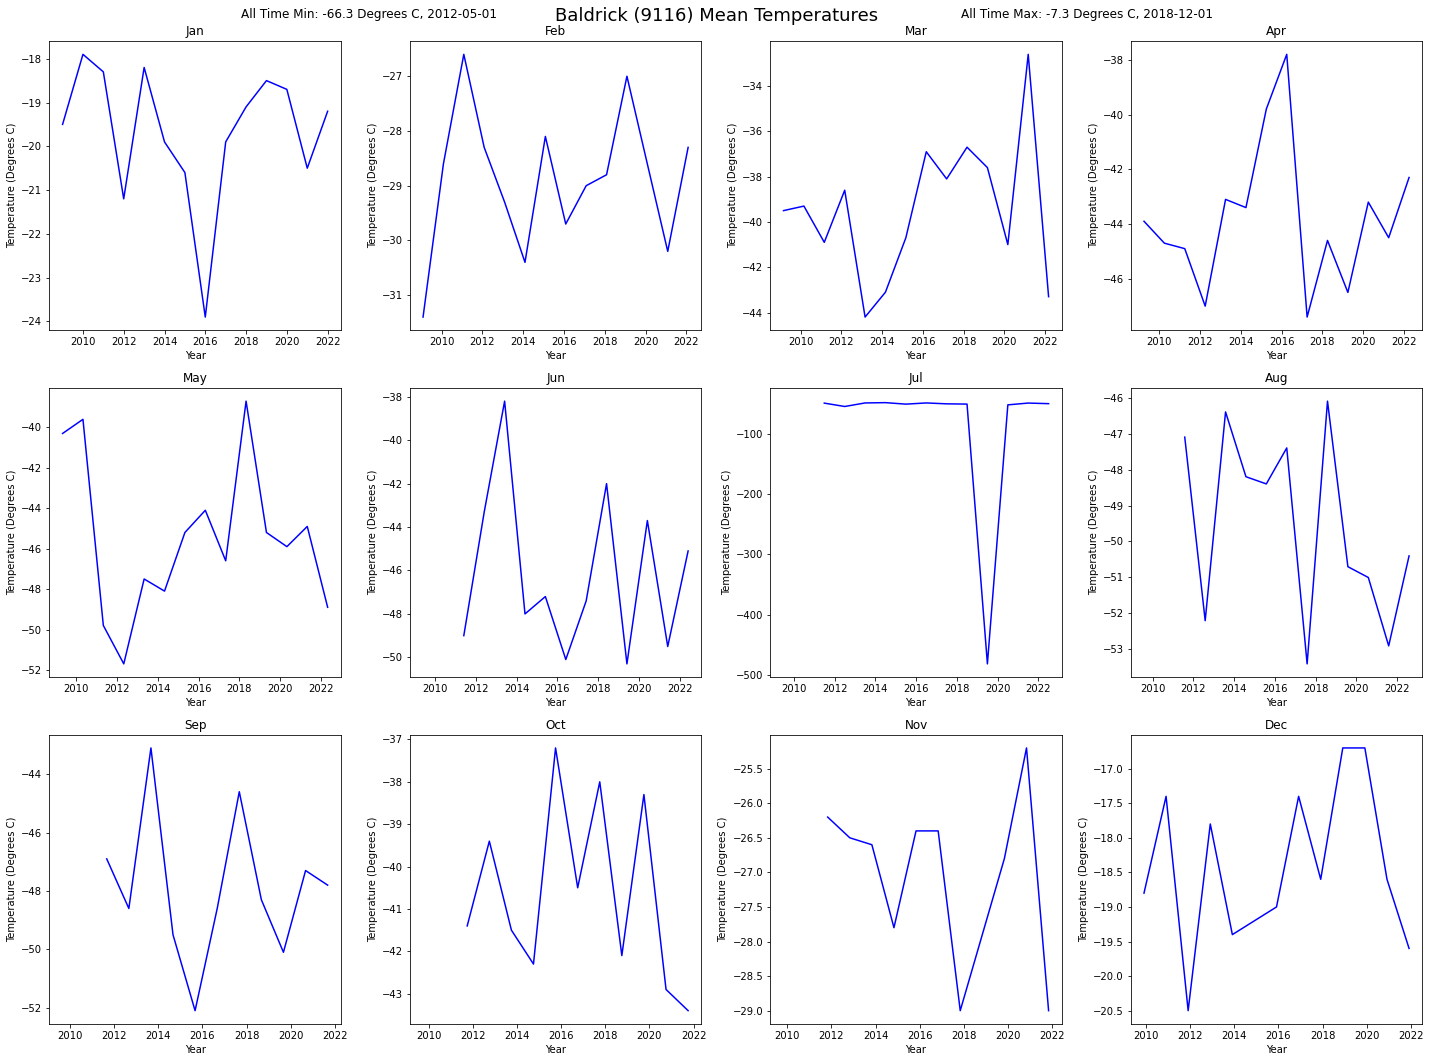

In [17]:
#Create a for loop that will perform the above expanded graphing procedure 
fig, ax1 = plt.subplots(3, 4, figsize = (20,15))
axs = ax1.flatten()
fig.set_facecolor('white')
fig.suptitle(station_name + ' Mean Temperatures', fontsize = 18)
fig.text(x=0.67, y=0.97, s = ('All Time Max: ' + str(air_max_temp) + ' Degrees C, ' + str(air_max_year)), fontsize = 12)
fig.text(x=0.17, y=0.97, s = ('All Time Min: ' + str(air_min_temp) + ' Degrees C, ' + str(air_min_year)), fontsize = 12)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = 0
y = 0

for month in months:
    temp_mean = df.loc[df['month'] == month]
    # wtf.reset_index(inplace = True, drop = True)
    # wtf['datetime'] = pd.to_datetime(wtf['datetime']).dt.year
    # print(wtf['datetime'])
    ax1[x,y].plot(temp_mean['mean temp'], color = 'blue')
    ax1[x,y].set_title(month)
    ax1[x,y].set_xlabel('Year')
    ax1[x,y].set_ylabel('Temperature (Degrees C)')
    # ax1[x,y].set_xticklabels(ax1[x,y].get_xlabel(), rotation = 45)
    # ax1[x,y].set_xticklabels(wtf['datetime'], rotation = 45)
    # print(wtf)
    
    
    y = y + 1
    if y == 4:
        x = x + 1
        y = 0
        
plt.tight_layout()
fig.savefig(save_path + '/' + station_name + '_mean_temp.png')

In [18]:
#Convert mean wind speed to float type 
df['mean wind speed (m/s)'] = df['mean wind speed (m/s)'].astype('float')

#Convert max air temperature to float type 
df['max wind vv'] = df['max wind vv'].astype('float')

#Identify all-time max temperature value and the year it occured 
wind_max_year = df['max wind vv'].idxmax()
wind_max_speed = df['max wind vv'].max()

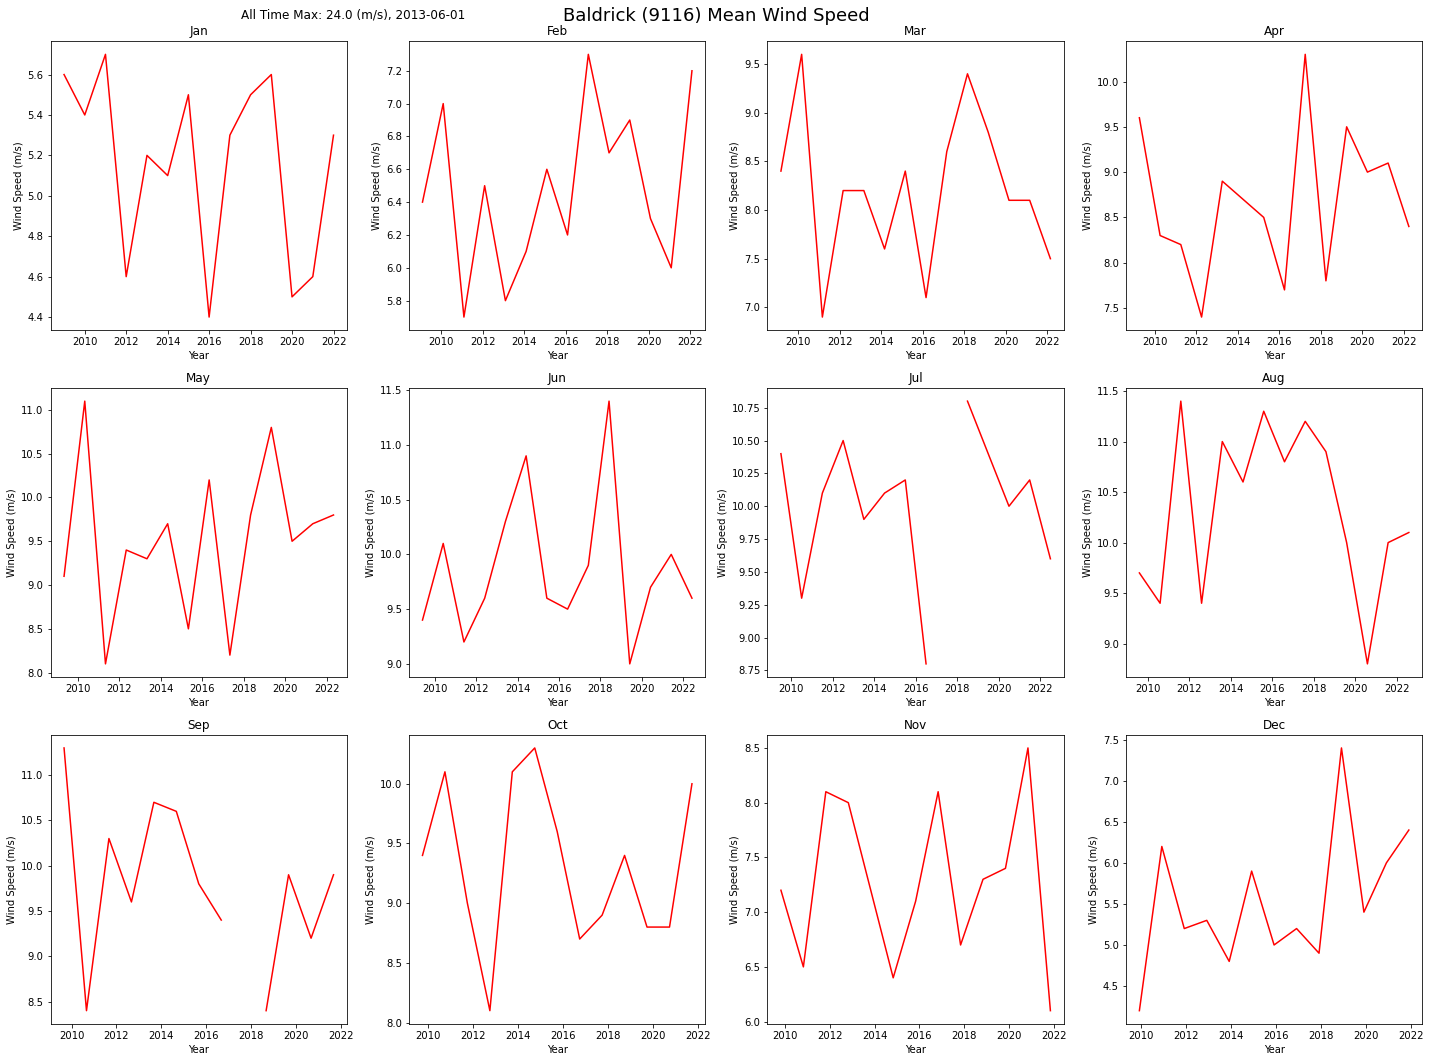

In [19]:
#Create a for loop that will perform the above expanded graphing procedure 
fig, ax2 = plt.subplots(3, 4, figsize = (20,15))
axs = ax2.flatten()
fig.set_facecolor('white')
fig.suptitle(station_name + ' Mean Wind Speed', fontsize = 18)
fig.text(x=0.17, y=0.97, s = ('All Time Max: ' + str(wind_max_speed) + ' (m/s), ' + str(wind_max_year)), fontsize = 12)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = 0
y = 0

for month in months:
    wind_mean = df.loc[df['month'] == month]
    # wtf.reset_index(inplace = True, drop = True)
    # wtf['datetime'] = pd.to_datetime(wtf['datetime']).dt.year
    # print(wtf['datetime'])
    ax2[x,y].plot(wind_mean['mean wind speed (m/s)'], color = 'red')
    ax2[x,y].set_title(month)
    ax2[x,y].set_xlabel('Year')
    ax2[x,y].set_ylabel('Wind Speed (m/s)')
    # ax1[x,y].set_xticklabels(ax1[x,y].get_xlabel(), rotation = 45)
    # ax1[x,y].set_xticklabels(wtf['datetime'], rotation = 45)
    # print(wtf)
    
    
    y = y + 1
    if y == 4:
        x = x + 1
        y = 0
        
plt.tight_layout()
fig.savefig(save_path + '/' + station_name + '_mean_wind.png')

In [20]:
#Convert mean wind speed to float type 
df['mean air pressure (mb)'] = df['mean air pressure (mb)'].astype('float')

#Convert max air temperature to float type 
df['max air pressure'] = df['max air pressure'].astype('float')
#Convert min air temperature to float type 
df['min air pressure'] = df['min air pressure'].astype('float')

#Identify all-time max temperature value and the year it occured 
airp_max_year = df['max air pressure'].idxmax()
airp_max = df['max air pressure'].max()
#Identify all-time min air temperature and the year it occured
airp_min_year = df['min air pressure'].idxmin()
airp_min = df['min air pressure'].min()

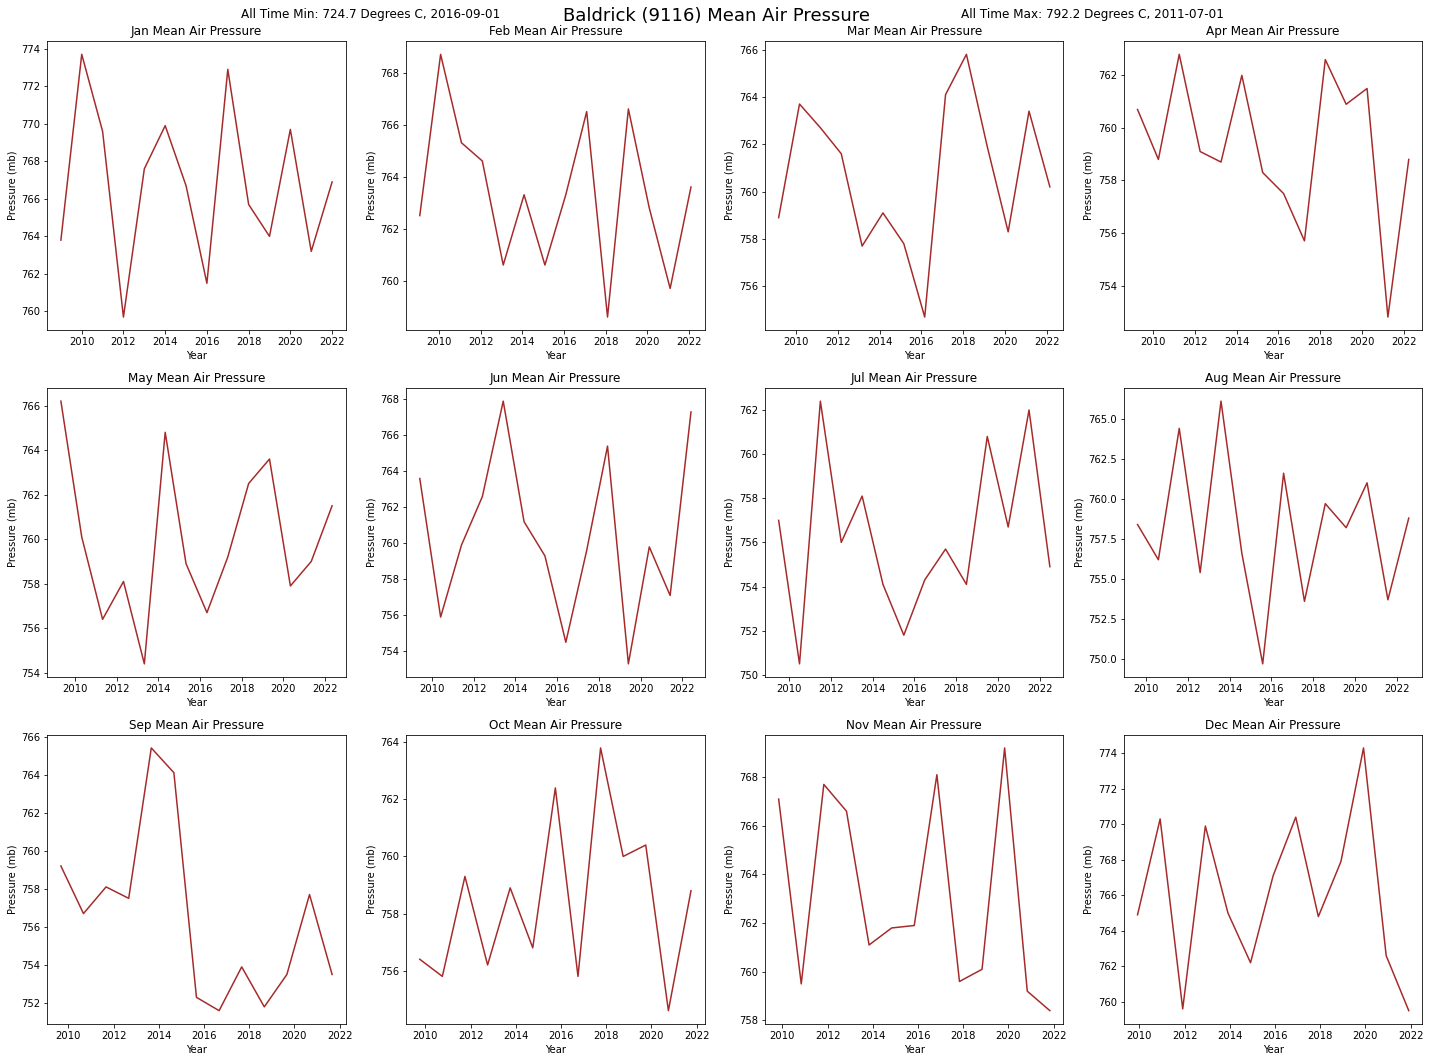

In [21]:
#Create a for loop that will perform the above expanded graphing procedure 
fig, ax3 = plt.subplots(3, 4, figsize = (20,15))
axs = ax3.flatten()
fig.set_facecolor('white')
fig.suptitle(station_name + ' Mean Air Pressure', fontsize = 18)
fig.text(x=0.67, y=0.97, s = ('All Time Max: ' + str(airp_max) + ' Degrees C, ' + str(airp_max_year)), fontsize = 12)
fig.text(x=0.17, y=0.97, s = ('All Time Min: ' + str(airp_min) + ' Degrees C, ' + str(airp_min_year)), fontsize = 12)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = 0
y = 0

for month in months:
    p_mean = df.loc[df['month'] == month]
    # wtf.reset_index(inplace = True, drop = True)
    # wtf['datetime'] = pd.to_datetime(wtf['datetime']).dt.year
    # print(wtf['datetime'])
    ax3[x,y].plot(p_mean['mean air pressure (mb)'], color = 'brown')
    ax3[x,y].set_title(month + ' Mean Air Pressure')
    ax3[x,y].set_xlabel('Year')
    ax3[x,y].set_ylabel('Pressure (mb)')
    # ax1[x,y].set_xticklabels(ax1[x,y].get_xlabel(), rotation = 45)
    # ax1[x,y].set_xticklabels(wtf['datetime'], rotation = 45)
    # print(wtf)
    
    
    y = y + 1
    if y == 4:
        x = x + 1
        y = 0
        
plt.tight_layout()
fig.savefig(save_path + '/' + station_name + '_mean_pressure.png')

In [22]:
df2 = df[['max air temp', 'min air temp', 'max wind vv', 'max air pressure', 'min air pressure']]
df2.to_csv(save_path + '/' + station_name + '_max_min_values.csv')